In [64]:
# importing stuff
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py

# training data
perc_train = 0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 10000
train: 8000


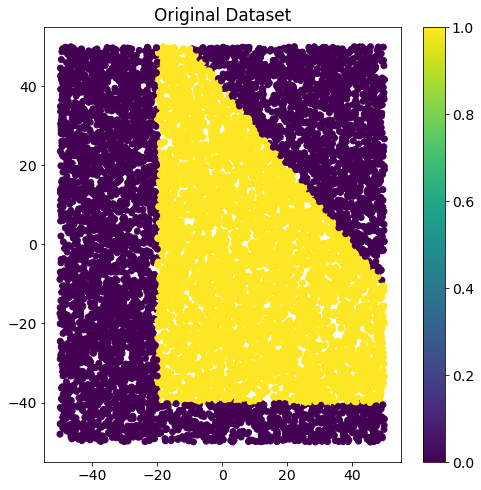

In [75]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

def plot_scatter(x,y,title):
    plt.figure(figsize = (8,8))
    plt.title(title)
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.colorbar()
    plt.show()

plot_scatter(x,y,'Original Dataset')

In [31]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 8000 	 Validation: 2000


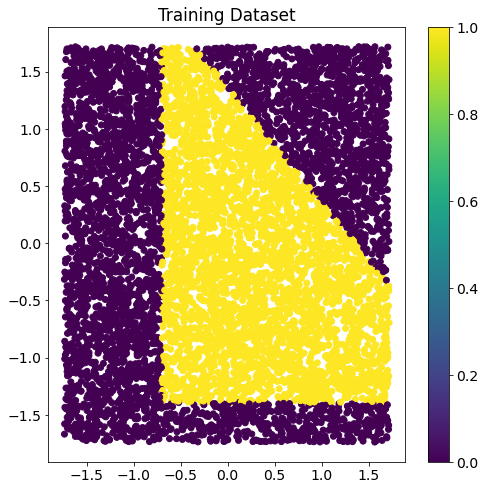

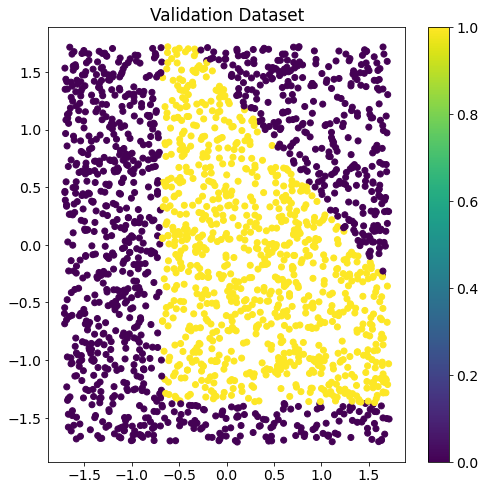

In [76]:
# rescaling
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

plot_scatter(x_train,y_train,'Training Dataset')
plot_scatter(x_valid,y_valid,'Validation Dataset')


In [81]:
# reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))

    model.add(Dropout(0.2))
    #The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during 
    # training time, which helps prevent overfitting. 
    # Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
    model.add(Dense(1,activation='hard_sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(3,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 2)                 6         
                                                                 
 dense_28 (Dense)            (None, 20)                60        
                                                                 
 dense_29 (Dense)            (None, 20)                420       
                                                                 
 dropout_6 (Dropout)         (None, 20)                0         
                                                                 
 dense_30 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [83]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [84]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
160/160 - 1s - loss: 0.5767 - accuracy: 0.6833 - val_loss: 0.5160 - val_accuracy: 0.7375 - 563ms/epoch - 4ms/step
Epoch 2/400
160/160 - 0s - loss: 0.4627 - accuracy: 0.7814 - val_loss: 0.4120 - val_accuracy: 0.7995 - 176ms/epoch - 1ms/step
Epoch 3/400
160/160 - 0s - loss: 0.3731 - accuracy: 0.8406 - val_loss: 0.3459 - val_accuracy: 0.8480 - 151ms/epoch - 942us/step
Epoch 4/400
160/160 - 0s - loss: 0.3258 - accuracy: 0.8676 - val_loss: 0.3098 - val_accuracy: 0.8725 - 153ms/epoch - 955us/step
Epoch 5/400
160/160 - 0s - loss: 0.2947 - accuracy: 0.8857 - val_loss: 0.2804 - val_accuracy: 0.8895 - 155ms/epoch - 969us/step
Epoch 6/400
160/160 - 0s - loss: 0.2696 - accuracy: 0.8935 - val_loss: 0.2620 - val_accuracy: 0.9005 - 146ms/epoch - 912us/step
Epoch 7/400
160/160 - 0s - loss: 0.2517 - accuracy: 0.9045 - val_loss: 0.2411 - val_accuracy: 0.9075 - 152ms/epoch - 949us/step
Epoch 8/400
160/160 - 0s - loss: 0.2347 - accuracy: 0.9097 - val_loss: 0.2242 - val_accuracy: 0.9075 - 141ms

In [70]:
# what can the fit history give us?
fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [85]:
def plot_history(fit):
    fig,axs=plt.subplots(1,2,figsize=[15,5])
    axs[0].plot(fit.history['loss'],color='C0',label='Train')
    axs[0].plot(fit.history['val_loss'],color='C2',label='Validation')
    axs[0].legend()
    axs[1].plot(fit.history['accuracy'],color='C1',label='Train')
    axs[1].plot(fit.history['val_accuracy'],color='C3',label='Validation')
    axs[1].legend()
    plt.show()

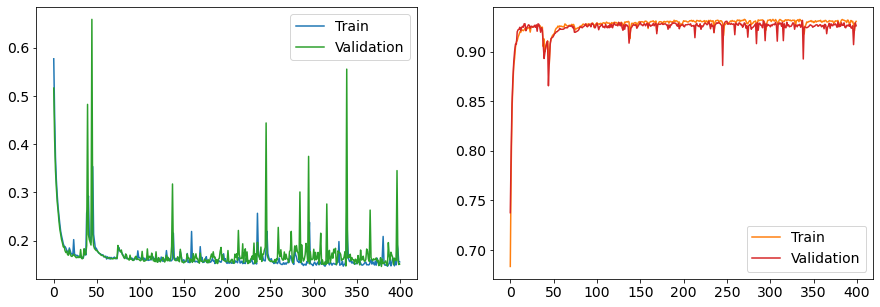

In [86]:
plot_history(fit)

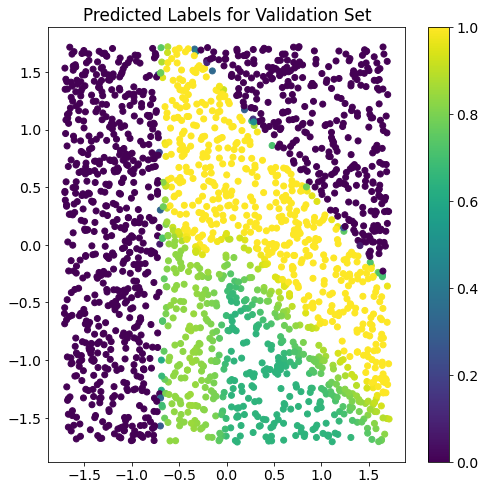

In [87]:
y_predict_valid=model.predict(x_valid)
plot_scatter(x_valid,y_predict_valid,'Predicted Labels for Validation Set')

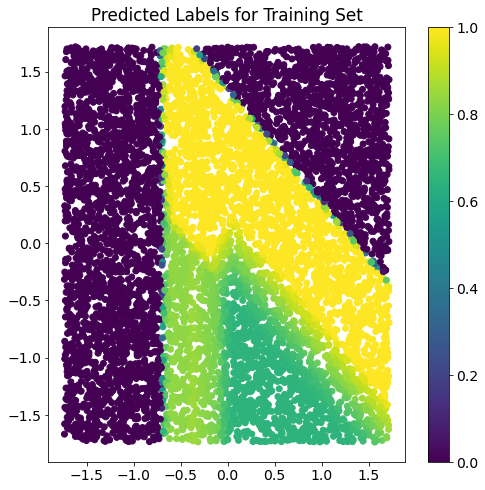

In [88]:
y_predict_train=model.predict(x_train)
plot_scatter(x_train,y_predict_train,'Predicted Labels for Training Set')